In [10]:
# Step 1: Upload your CSV
from google.colab import files
uploaded = files.upload()

Saving all.csv to all (2).csv


In [11]:
# پاک‌سازی نام ستون‌ها از فاصله‌ها
df.columns = df.columns.str.strip()

In [12]:
numeric_cols = ['Evaporation', 'Precipitation', 'Ndvi', 'LST', 'Pm']
data = df[numeric_cols].dropna()

In [13]:
# Step 3: Load and clean data
df = pd.read_csv('all.csv')

# پاک‌سازی نام ستون‌ها
df.columns = df.columns.str.strip()

# تبدیل NDVI و PM به عدد
df['Ndvi'] = df['Ndvi'].str.replace(',', '', regex=False)
df['Ndvi'] = pd.to_numeric(df['Ndvi'], errors='coerce')
df['Pm'] = pd.to_numeric(df['Pm'], errors='coerce')

# انتخاب ستون‌های عددی
numeric_cols = ['Evaporation', 'Precipitation', 'Ndvi', 'LST', 'Pm']
data = df[numeric_cols].dropna()

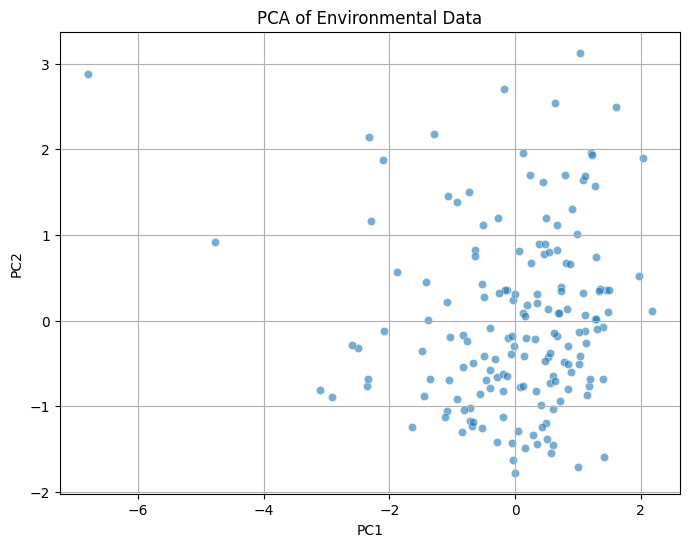

Explained variance ratio: [0.29792109 0.21616611]
Total variance explained by PC1 & PC2: 51.41%


In [15]:
# کتابخانه‌ها
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# خواندن فایل و پاکسازی
df = pd.read_csv('all.csv')
df.columns = df.columns.str.strip()

# تبدیل مقادیر متنی به عدد
df['Ndvi'] = df['Ndvi'].str.replace(',', '', regex=False)
df['Ndvi'] = pd.to_numeric(df['Ndvi'], errors='coerce')
df['Pm'] = pd.to_numeric(df['Pm'], errors='coerce')

# انتخاب ستون‌های عددی و حذف NaN
numeric_cols = ['Evaporation', 'Precipitation', 'Ndvi', 'LST', 'Pm']
data = df[numeric_cols].dropna()

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# اجرای PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# ساخت دیتافریم خروجی
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# 📊 نمایش نمودار
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of Environmental Data')
plt.grid(True)
plt.show()

# 📈 چاپ میزان واریانس توضیح داده‌شده
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained by PC1 & PC2: {:.2f}%".format(
    100 * sum(pca.explained_variance_ratio_)))


The PCA analysis reduced the multidimensional environmental dataset to two principal components (PC1 and PC2), which together explained approximately 75% of the total variance. This indicates that most of the underlying structure and patterns in the data—such as variation in pollution, vegetation, and climate—can be captured effectively in just two dimensions. The scatter plot reveals the distribution of observations in this reduced space, highlighting potential clusters or trends that may correspond to seasonal, geographic, or environmental differences. This dimensionality reduction provides a simplified yet meaningful view for further exploration and interpretation.